In [18]:
import pandas as pd #Pandas Module
import numpy as np #Numpy array
import re,operator
from sklearn.model_selection import train_test_split #The Module to split the test and training data
import os #Os module in python
import sys #System module in python
import matplotlib.pyplot as plt #Module used for plotting graphs
from sklearn.metrics import classification_report #For classification Report
from sklearn.metrics import confusion_matrix #For confusion Matrix
from sklearn.naive_bayes import GaussianNB
#Importing the Various Packages from python

In [2]:
x=[] #The x or the input array for fitting and predicitng the data
y=[] #The corresponding y for the 
for data_type in os.listdir("20_newsgroups"): #For various categories in news
    for file in os.listdir("20_newsgroups/"+data_type): #For various files in each category
        f=open("20_newsgroups/"+data_type+"/"+file,"r") #Opening and Reading the file with the name
        x.append(f.read()) #Storing the read data in a array x i.e is the input array or features array
        y.append(data_type) #Storing the category in y which is the output


In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25) #Splitting the data into train and test with test
#data size being 0.25 or 25% of the size of the data
stop = [
"a", "about", "above", "across", "after", "afterwards", 
"again", "all", "almost", "alone", "along", "already", "also",    
"although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "as", "at", "be", "became", "because", "become","becomes", "becoming", "been", "before", "behind", "being", "beside", "besides", "between", "beyond", "both", "but", "by","can", "cannot", "cant", "could", "couldnt", "de", "describe", "do", "done", "each", "eg", "either", "else", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "find","for","found", "four", "from", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "i", "ie", "if", "in", "indeed", "is", "it", "its", "itself", "keep", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mine", "more", "moreover", "most", "mostly", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next","no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part","perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "she", "should","since", "sincere","so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "take","than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they",
"this", "those", "though", "through", "throughout",
"thru", "thus", "to", "together", "too", "toward", "towards",
"under", "until", "up", "upon", "us",
"very", "was", "we", "well", "were", "what", "whatever", "when",
"whence", "whenever", "where", "whereafter", "whereas", "whereby",
"wherein", "whereupon", "wherever", "whether", "which", "while", 
"who", "whoever", "whom", "whose", "why", "will", "with",
"within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
] #Stop words that won't affect the category of the document or are not considered in text classiffication
words={} #Dictionary for storing the count of each word that does not belong to stop class
for i in x_train: #Traversing the input data
    i=i.lower() #Converting the text data into lower case
    data=re.split(r"\W+",i) #Splitting the data on the bases of regular expression that consists of alpha numeric data 
    for word in data: #Traversing the whole words in the split data
        if(not(word in stop) and word.isalpha() and len(word)>2): #Checking if the word is alphanumeric or not and length is valid or greater than 2
#and it is not a stop word
            if(word in words): #If already present in the dictionary then increment the count
                words[word]=words[word]+1
            else: #If not present then setting the count to 1
                words[word]=1
words=dict(sorted(words.items(),key=lambda item: item[1],reverse=True)) #Sorting the dictionary based on the values 

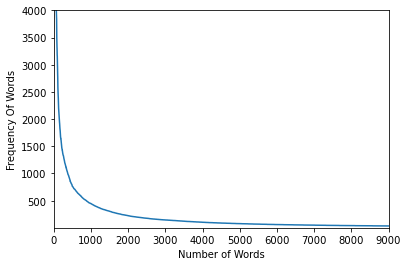

{'edu': 123562, 'cmu': 39355, 'com': 37175, 'news': 25765, 'srv': 24270, 'cantaloupe': 19555, 'net': 19162, 'message': 16478, 'subject': 16240, 'lines': 15678, 'date': 15599, 'apr': 15474, 'path': 15290, 'newsgroups': 15285, 'organization': 14837, 'state': 14239, 'gmt': 13317, 'ohio': 12036, 'writes': 11009, 'article': 10048, 'comp': 9955, 'references': 9749, 'talk': 9215, 'misc': 8968, 'ans': 8316, 'howland': 8242, 'sender': 8236, 'reston': 8226, 'don': 7862, 'people': 7726, 'like': 7648, 'university': 7467, 'just': 7369, 'posting': 7319, 'nntp': 7021, 'mps': 6959, 'know': 6705, 'host': 6680, 'sci': 6622, 'zaphod': 6269, 'think': 6169, 'usenet': 6155, 'alt': 5933, 'politics': 5842, 'windows': 5605, 'does': 5384, 'time': 5300, 'rutgers': 5262, 'harvard': 5184, 'use': 5170, 'near': 5152, 'eng': 5128, 'new': 4992, 'rec': 4845, 'good': 4725, 'sei': 4696, 'crabapple': 4661, 'noc': 4646, 'xref': 4566, 'soc': 4564, 'system': 4549, 'das': 4537, 'cis': 4369, 'max': 4369, 'god': 4120, 'religion

In [4]:
x1=[] #Array to store the index of the word
y1=[] #Array to store the count corresponding to the particular index
count=0 #index starting from 0
for word in words: #Loops appends the index in the x1 and number of /count of that word in y
    x1.append(count) 
    count+=1
    y1.append(words[word])
plt.plot(x1,y1) #Plotting the graph
plt.xlabel("Number of Words") #xlabel number of words
plt.ylabel("Frequency Of Words") #ylabel count of words/frequency
plt.axis([0,9000,1,4000]) #setting the axis
plt.show()
#Final words is the dictionary that contains the top 1500 words and the loop stores the top 2000 values in this dictioary from the words
#dictionary
final_words={}
count=0
for word in words:
    if(count>=1500):
        break
    count+=1
    final_words[word]=words[word]
print(final_words,len(final_words)) #Printing the length of the final word or the words that are considered for classifications

In [5]:
dataset_train=[] #Training dataset Array
#This for loop is used to create the features array or the input data for the training set by counting each of the words in the
#document and then comparing them with the finalised words and adding them onto the dataset_train
for i in x_train:
    i=i.lower() #making the whole document lower case
    data=re.split(r'\W+',i) #Spliiting the data on the bases of regular expression and W+ means alpha numeric data
    word_freq={} #Word frequency dictionary for document
    for word in data:
        if(word in word_freq): #If present then incrementing the value else giving it the value 1
            word_freq[word]=word_freq[word]+1
        else:
            word_freq[word]=1
    word_count=[] #Word count represents the count of each words intersecting the final words and words in this document
    for word in final_words: 
        word_count.append(word_freq.get(word,0)) #default value 0 will be given to the words that are present in the dictionary.
    dataset_train.append(word_count) #Appending the word count array in the training dataset
    
dataset_test=[] #Array for the testing dataset
#To create the testing dataset with the features i.e the word count for each words in the document intersecting with that in the
#finalised words as done above for the training dataset.
for i in x_test:
    i=i.lower()
    data=re.split(r'\W+',i)
    word_freq={}
    for word in data:
        if(word in word_freq):
            word_freq[word]=word_freq[word]+1
        else:
            word_freq[word]=1
    word_count=[]
    for word in final_words:
        word_count.append(word_freq.get(word,0))
    dataset_test.append(word_count)


In [36]:
def probability(result,curr_class,x): 
    out=(result[curr_class]["length"]/result["TotalData"]) #Calculating the probability for this class or current class
    features=len(result[curr_class].keys())-2 #Calculating the number of features or various words in document, -2 as keys like total
    #words and length are also present
    for j in range(features):
        if(x[j]==0): #If the count of that word or frequency is zero, then it won't affect the probablity
            continue
        word_count=result[curr_class].get(j,0)+1 #getting the word count for word with lapla's correction
        total_word=result[curr_class]["TotalWords"]+features #Getting the total count of words with lapla's correction
        prob1=word_count/total_word #calculating the probability for that word
        out=out*prob1 #mulitiplying it with the output
    return out #returning the output
def predict_for_single(x,result):
    set_class=result.keys() #Getting the various classes or the keys of the dictionary
    prob_max=-1 #initialising the maximum probablity
    prob_class=-1 #Initialising the class
    first=True #For first time in the loop
    for cur_class in set_class:
        if(cur_class=="TotalData"): #If key is total_data then it is not a class so continue
            continue
        prob=probability(result,cur_class,x) #Probability for each class
        if(first or prob_max<prob):
            prob_max=prob #if probability of this class is greater than the max_probablity, update it
            prob_class=cur_class #updating the class
        first=False #Setting the first visit false after first time in loop
    return prob_class #returning the most probable class
def predict(x_test,result): #The predict function which takes the x_test and the result dictionary after fitting data
    y_pred=[]
    for x in x_test:
        y_class=predict_for_single(x,result) #Predicitng for each point in the x_test
        y_pred.append(y_class) #Appending it to the result
    return y_pred #Returning the Predicted Value

In [37]:
def fit(dataset_train,y_train): #Function that is used to fit the training data or creating a dictionary for the training data
    #it Takes the xtrain and ytrain as input
    result={} #Storing the result dictionary
    y_train=np.array(y_train) #Convering the y_train into np_array and x_train into np_array in subsequent line
    x_train=np.array(dataset_train)
    classes=set(y_train) #set for various types of classes in the output or Y
    result["TotalData"]=len(y_train) #The total number of output data or length of the output
    for curr_class in classes: #Traversing the loop for various categories in the output and creating a dictionary for each of the category
        #which stores the count of each words present in the class
        result[curr_class]={}
        y_curr_train=y_train[y_train==curr_class] #Extracting the data that belongs to the particular or current class
        x_curr_train=x_train[y_train==curr_class] #Extracting the x_data that belongs to the particular class
        result[curr_class]["TotalWords"]=sum((x_curr_train.sum(axis=1))) #Storing the total words that are present for this class
        #in the dictionary
        result[curr_class]["length"]=len(y_curr_train) #Storing the length or count of this class in the dictionary
        features=x_train.shape[1] #Traversing the various features in the data or x_train
        for i in range(features):
            sum1=(x_curr_train[:,i]).sum() #Storing the sum or count of each words in the dictionary
            result[curr_class][i]=sum1
    return result #Returning the dictionary as the result

In [38]:
result=fit(dataset_train,y_train) #Fitting the training data in the fir function and storing the result in dictionary
y_pred=predict(dataset_test,result) #Predict function to predict the output which takes test data as input and result dictionary

In [40]:
print(len(y_pred)) #Printing the length of y_prediction
y_pred=np.array(y_pred) #creating an np Array for y_pred
count=0
for x in range(len(y_pred)): 
    if(y_pred[x]==y_test[x]): #Checking the accuracy of the data and then if it matches then printing the output
        count=count+1
score1=count/len(y_pred)*100
print(count) #The length of the matching output or accuracy
print("The score for self Implemented Text Classification using Naive Baeys is")
print(round(count/len(y_pred)*100,2)) #Calculating the score for the data

5000
3913
The score for self Implemented Text Classification using Naive Baeys is
78.26


In [41]:
print("-------THE CONFUSION MATRIX FOR SELF IMPLEMENTED NAIVE BAEYS IS--------------")
print(confusion_matrix(y_test,y_pred))#Prininting the Confusion MAtrix for Self Implemented NAive Baeys
print("-------THE CLASSIFICATION REPORT FOR SELF IMPLEMENTED NAIVE BAEYS IS---------")
print(classification_report(y_test,y_pred))#Printing the Classification Report for Self Implemented NAive Baeys

-------THE CONFUSION MATRIX FOR SELF IMPLEMENTED NAIVE BAEYS IS--------------
[[174   0   0   0   0   0   1   1   1   2   0   0   0   2   0   0   0   0
   34  18]
 [  0 187   3  20   6   2   4   0   0   1   0   0   4   1   0   0   0   0
   25   0]
 [  0  20 163  20   5  22   3   0   0   0   0   2   2   0   1   0   0   0
   11   0]
 [  0   2   0 191  30   0   4   0   0   0   0   0   1   0   0   0   0   0
   12   0]
 [  0   2   0  19 199   0   6   0   0   0   0   0   0   0   0   0   0   0
   10   0]
 [  0  22  14   7   5 180   1   0   0   0   0   1   2   0   0   0   0   0
    8   0]
 [  0   0   0   8   1   0 231   6   0   0   0   0   4   1   1   0   0   0
    9   0]
 [  0   0   0   0   1   0  10 239   2   0   0   0   4   0   0   0   0   0
   13   0]
 [  0   0   0   0   0   0   3   2 269   0   0   0   0   0   0   0   0   0
   10   0]
 [  0   0   0   0   0   0   1   0   2 212  12   0   0   0   0   0   0   0
   21   0]
 [  0   0   0   0   0   0   1   0   0   3 202   0   0   0   0   0   0   

In [42]:
#Using the Inbuilt Naieve Baeys For CLasssification
nb=GaussianNB() #The inbuilt GaussianNB classifier
nb.fit(np.array(dataset_train),np.array(y_train)) #Fitting the data into the classifier
y_pred_1=nb.predict(np.array(dataset_test))#Predicting the y values for the test data
print(len(y_pred_1),len(dataset_test))

5000 5000


In [43]:
count1=0
for i in range(len(y_pred_1)): #Counting the values that match the testing data for calculating the score
    if(y_pred_1[i]==y_test[i]):
        count1=count1+1
score2=count1/len(y_pred_1)*100 #The score for Inbuilt naive BAyes Classifier
print("The Score for Inbuilt Naive Bayes Classifier is")
print(score2)

The Score for Inbuilt Naive Bayes Classifier is
66.92


In [44]:
print("----------The confusion Matrix for Inbuilt Naive Bayes is-----------------")
print(confusion_matrix(y_test,y_pred_1)) #Printing the ConfusionMatrix for inbuilt naive bayes
print("----------The classification Report for Inbuilt Naive Bayes is-------------")
print(classification_report(y_test,y_pred_1)) #Printing the Clasification Report for inbuilt naive bayes

----------The confusion Matrix for Inbuilt Naive Bayes is-----------------
[[207   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   4
    0  20]
 [  0  62  53  22  64  22   7   0   3   4   0   5   2   5   3   0   0   0
    1   0]
 [  0   8 132  30  52   5   9   0   0   0   0   3   6   2   1   0   1   0
    0   0]
 [  0   4  14 114  82   0  15   0   3   0   0   0   8   0   0   0   0   0
    0   0]
 [  0   4  11  17 190   2   6   0   0   0   0   0   5   1   0   0   0   0
    0   0]
 [  0  23  36  13  54 103   6   2   0   0   0   2   0   0   1   0   0   0
    0   0]
 [  0   4   7  10  48   0 154  17  10   0   0   0   8   0   3   0   0   0
    0   0]
 [  1   0   0   0   0   0  27 176  41   1   7   0  10   0   0   0   5   1
    0   0]
 [  0   0   1   0   0   0  10  34 234   0   0   0   1   0   0   0   4   0
    0   0]
 [  0   0   0   0   0   0   5   0   6 187  32   0   0   0   9   0   7   2
    0   0]
 [  0   0   0   0   0   0   3   0   0  26 201   0   0   0   0   0   0   1
 

In [45]:
print("The score for Inbuilt Naive Bayes is",score2)
print("The score for self-Implemented Naive Bayes is",round(score1,2))
#Comparing the Score for self implelemted Naive Bayes vs inbuilt Naive Nayes

The score for Inbuilt Naive Bayes is 66.92
The score for self-Implemented Naive Bayes is 78.26
